In [1]:
import pandas as pd 
import numpy as np 
import sklearn as sk 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
weather=pd.read_csv(r'C:\Users\ASUS\Downloads\DATA_12122019.csv')
weather

,DATE,TIME,T_AIR,HUM,DEW,T_AIR2,HUM2,BARO,WDIR,WSPD,...,WSPD_Z,SRAD,SR SUM,RAINF,T_SOIL,T_SOIL2,SOIL_P,UNITS,CKSUM,!220
0,09/00/14,14:40,92.1,97.0,90.5,92.4,0.0,24.64,215.0,1.3,...,0.0,168.0,3.050000e+06,0.00,54.1,84.3,0.0,0.0,!082,NaN
1,9/13/2014,14:50,92.8,97.0,90.5,92.8,0.0,24.64,253.0,1.1,...,0.0,84.0,3.100000e+06,0.00,54.3,84.3,0.0,0.0,!084,NaN
2,9/13/2014,15:00,91.7,97.0,90.5,92.1,0.0,24.64,255.0,1.4,...,0.0,92.0,3.160000e+06,0.00,54.3,84.3,0.0,0.0,!067,NaN
3,9/13/2014,15:10,90.8,97.0,88.7,91.2,0.0,24.64,253.0,1.7,...,0.0,48.0,3.190000e+06,0.00,54.5,84.3,0.0,0.0,!102,NaN
4,9/13/2014,15:20,89.9,97.0,88.7,90.1,0.0,24.64,255.0,1.4,...,0.0,24.0,3.210000e+06,0.00,54.5,84.3,0.0,0.0,!080,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53763,5/11/2016,13:40,87.9,97.0,86.9,87.9,0.0,42.69,268.0,2.5,...,0.0,0.0,3.050000e+06,0.00,-1.7,87.2,82.2,0.0,!087,NaN
53764,5/11/2016,13:50,87.8,97.0,86.9,87.8,0.0,42.69,265.0,2.4,...,0.0,0.0,3.050000e+06,0.00,-1.7,87.2,82.4,0.0,!088,NaN
53765,5/11/2016,14:00,87.4,97.0,85.1,87.4,0.0,42.69,261.0,2.4,...,0.0,0.0,3.050000e+06,0.00,-1.7,87.2,82.0,0.0,!056,NaN
53766,12/12/2019,16:40,147.7,8.0,999.9,146.6,7.0,42.69,270.0,0.0,...,0.0,9999.0,2.680000e+09,99.99,999.9,999.9,0.0,0.0,!025,NaN


In [3]:
print(type(weather))
weather.dtypes


<class 'pandas.core.frame.DataFrame'>


DATE        object
TIME        object
T_AIR      float64
HUM        float64
DEW        float64
T_AIR2     float64
HUM2       float64
BARO       float64
WDIR       float64
WSPD       float64
WS_MAX     float64
WSPD_U     float64
WSPD_V     float64
WSPD_Z     float64
SRAD       float64
SR SUM     float64
RAINF      float64
T_SOIL     float64
T_SOIL2    float64
SOIL_P     float64
UNITS      float64
CKSUM       object
!220       float64
dtype: object

In [4]:
weather=weather.drop([53766,53767],axis=0)
weather.drop(["UNITS","CKSUM","!220"],axis=1,inplace=True)
weather


,DATE,TIME,T_AIR,HUM,DEW,T_AIR2,HUM2,BARO,WDIR,WSPD,WS_MAX,WSPD_U,WSPD_V,WSPD_Z,SRAD,SR SUM,RAINF,T_SOIL,T_SOIL2,SOIL_P
0,09/00/14,14:40,92.1,97.0,90.5,92.4,0.0,24.64,215.0,1.3,69.0,25.0,93.0,0.0,168.0,3050000.0,0.0,54.1,84.3,0.0
1,9/13/2014,14:50,92.8,97.0,90.5,92.8,0.0,24.64,253.0,1.1,64.3,47.0,101.0,0.0,84.0,3100000.0,0.0,54.3,84.3,0.0
2,9/13/2014,15:00,91.7,97.0,90.5,92.1,0.0,24.64,255.0,1.4,52.6,45.0,101.0,0.0,92.0,3160000.0,0.0,54.3,84.3,0.0
3,9/13/2014,15:10,90.8,97.0,88.7,91.2,0.0,24.64,253.0,1.7,43.9,39.0,99.0,0.0,48.0,3190000.0,0.0,54.5,84.3,0.0
4,9/13/2014,15:20,89.9,97.0,88.7,90.1,0.0,24.64,255.0,1.4,56.7,32.0,112.0,0.0,24.0,3210000.0,0.0,54.5,84.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53761,5/11/2016,13:20,88.5,97.0,86.9,88.5,0.0,42.69,261.0,2.4,94.8,36.0,64.0,0.0,0.0,3050000.0,0.0,-1.7,87.2,82.2
53762,5/11/2016,13:30,88.1,97.0,86.9,88.1,0.0,42.69,261.0,2.2,96.5,49.0,76.0,0.0,0.0,3050000.0,0.0,-1.7,87.2,82.5
53763,5/11/2016,13:40,87.9,97.0,86.9,87.9,0.0,42.69,268.0,2.5,46.4,70.0,81.0,0.0,0.0,3050000.0,0.0,-1.7,87.2,82.2
53764,5/11/2016,13:50,87.8,97.0,86.9,87.8,0.0,42.69,265.0,2.4,70.2,69.0,82.0,0.0,0.0,3050000.0,0.0,-1.7,87.2,82.4


In [5]:
weather1=weather[['DATE','T_AIR']]
weather1


,DATE,T_AIR
0,09/00/14,92.1
1,9/13/2014,92.8
2,9/13/2014,91.7
3,9/13/2014,90.8
4,9/13/2014,89.9
...,...,...
53761,5/11/2016,88.5
53762,5/11/2016,88.1
53763,5/11/2016,87.9
53764,5/11/2016,87.8


In [6]:
df=pd.DataFrame(weather1)
print(df.max())


DATE     9/9/2015
T_AIR       109.2
dtype: object


In [7]:
df1=pd.DataFrame(weather1)
df1=df1[(df1['T_AIR']>=95)&(df1['T_AIR']<=109.2)]
df1

,DATE,T_AIR
273,9/15/2014,95.1
417,9/16/2014,95.7
418,9/16/2014,95.5
419,9/16/2014,95.5
432,9/16/2014,95.5
...,...,...
53738,5/11/2016,98.7
53739,5/11/2016,98.7
53740,5/11/2016,98.4
53741,5/11/2016,97.3


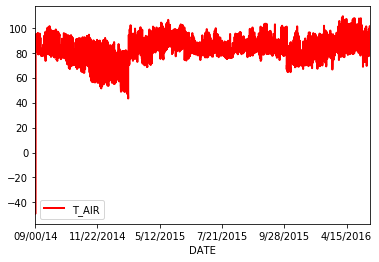

In [8]:
df3=pd.DataFrame(weather1)
df3.plot(x='DATE',y='T_AIR',kind='line',linewidth=2,color='red')
plt.show()


In [9]:
weather2=weather.drop(['DATE','TIME'],axis=1)
weather2.to_csv('DATA.csv')
weather2=pd.read_csv('DATA.csv')
weather2


,Unnamed: 0,T_AIR,HUM,DEW,T_AIR2,HUM2,BARO,WDIR,WSPD,WS_MAX,WSPD_U,WSPD_V,WSPD_Z,SRAD,SR SUM,RAINF,T_SOIL,T_SOIL2,SOIL_P
0,0,92.1,97.0,90.5,92.4,0.0,24.64,215.0,1.3,69.0,25.0,93.0,0.0,168.0,3050000.0,0.0,54.1,84.3,0.0
1,1,92.8,97.0,90.5,92.8,0.0,24.64,253.0,1.1,64.3,47.0,101.0,0.0,84.0,3100000.0,0.0,54.3,84.3,0.0
2,2,91.7,97.0,90.5,92.1,0.0,24.64,255.0,1.4,52.6,45.0,101.0,0.0,92.0,3160000.0,0.0,54.3,84.3,0.0
3,3,90.8,97.0,88.7,91.2,0.0,24.64,253.0,1.7,43.9,39.0,99.0,0.0,48.0,3190000.0,0.0,54.5,84.3,0.0
4,4,89.9,97.0,88.7,90.1,0.0,24.64,255.0,1.4,56.7,32.0,112.0,0.0,24.0,3210000.0,0.0,54.5,84.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53761,53761,88.5,97.0,86.9,88.5,0.0,42.69,261.0,2.4,94.8,36.0,64.0,0.0,0.0,3050000.0,0.0,-1.7,87.2,82.2
53762,53762,88.1,97.0,86.9,88.1,0.0,42.69,261.0,2.2,96.5,49.0,76.0,0.0,0.0,3050000.0,0.0,-1.7,87.2,82.5
53763,53763,87.9,97.0,86.9,87.9,0.0,42.69,268.0,2.5,46.4,70.0,81.0,0.0,0.0,3050000.0,0.0,-1.7,87.2,82.2
53764,53764,87.8,97.0,86.9,87.8,0.0,42.69,265.0,2.4,70.2,69.0,82.0,0.0,0.0,3050000.0,0.0,-1.7,87.2,82.4


In [10]:
X=weather2.drop(['T_AIR'],axis=1)
Y=weather2['T_AIR']
Y=Y.values.reshape(-1,1)
min_index=14321
mins=[i for i in range(Y.size)]
temp=LinearRegression()
temp.fit(X,Y)
print(temp)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [11]:
inp=np.array([[92.1],[97],[90.5],[92.4],[0.0],[24.64],[215.0],[1.3],[69.0],[25.0],[93.0],[0.0],[168.0],[3050000.0],[0.0],[54.1],[84.3],[0]])
inp=inp.reshape(1,-1)
print("The temperature for the input is:",temp.predict(inp))

The temperature for the input is: [[92.27455745]]


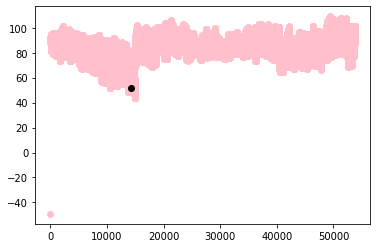

Temperature Prediction Curve over time


In [12]:
plt.scatter(mins,Y,color='pink')
plt.scatter(mins[min_index],Y[min_index],color='black')
plt.show()
print("Temperature Prediction Curve over time")

TEMPERATURE vs selected attributes graph: 


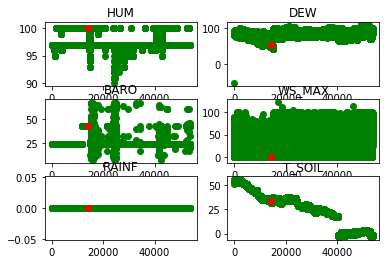

In [13]:
x2 = X.filter(['HUM', 'DEW', 'BARO', 
                  'WS_MAX', 'RAINF', 
                  'T_SOIL'], axis = 1) 
  
# plot a graph with a few features (x values) 
# against the precipitation or rainfall to observe 
# the trends 
  
print("TEMPERATURE vs selected attributes graph: ") 
  
for i in range(x2.columns.size): 
    plt.subplot(3, 2, i + 1) 
    plt.scatter(mins, x2[x2.columns.values[i][:100]], 
                                               color = 'g') 
  
    plt.scatter(mins[min_index],  
                x2[x2.columns.values[i]][min_index], 
                color ='r') 
  
    plt.title(x2.columns.values[i]) 
  
plt.show() 